# GEE python

GEE 也有[python接口](https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api-guiattard)，可以和command shell，web application和jupyter交互。和JS相比，python API可以在脚本间分享代码，允许序列调用GEE，有很多绘图选项，比如matplotlib，seaborn，plotly，bokeh，pygal，ggplot和altair等，可以常用python库一起使用。最直接的调用GEE的方式可以查看GEE原文档 [Python installation](https://developers.google.com/earth-engine/python_install)，这里主要尝试使用[GEEMAP](https://github.com/giswqs/geemap)（教程在这里：[mdpi-gee.pdf](https://spatial.utk.edu/ppt/mdpi-gee.pdf)，还有[bilibili geemap](https://space.bilibili.com/527404442/channel/detail?cid=132674)），还有[wxee](https://github.com/aazuspan/wxee)等更易用的工具，以此简单记录下关于GEE python的使用。更多GEE python工具可以参考[GEE开发者资源](https://developers.google.com/earth-engine/tutorials/community/developer-resources#python)

## geemap Installation

geemap 可以看成是gee python接口的高级封装，所以自然要先安装gee python接口所需要的东西。

有两种方式可以快速上手，一种是在云端运行，一种是本地。云端运行需要配置colab，这部分可以参考 [Earth Engine Python API & Colab](https://docs.google.com/presentation/d/e/2PACX-1vTFAWIEBg3aVhY5dImnTzTDmbgnu9A4pEOW6OUdpoCLvxD1ot3UI0qbcD90oXsR0CJdWQz-kAUE_2tb/pub?start=false&loop=false&delayms=3000)。然后在云端配置GEE环境，并验证。colab每次重新加载进来之后都需要重新配置环境。所以目前个人觉得不是特别方便，可能配合使用google云服务比较好，这里还是以本地为主了。

最基础的GEE python接口需要的环境一般有：

- python
- 包管理器（conda/pip）
- GEE Python API
- Python数据科学计算库

这些在本repo的environment.yml文件中都已经包含了，也已经包含geemap了，所以在运行本repo前的安装中都已经安装过了，即在项目根目录下打开终端，执行以下语句即可：

```Shell
conda env create -f environment.yml
```

安装过了就不必再执行了。

In [1]:
import ee

导入ee没有报错，说明已经安装了gee的python接口了。

然后需要获取credentials才可以使用API，这是一个授权本地代表谷歌账号访问GEE的凭证。

原始方法是在终端使用下面命令：

``` Shell
earthengine authenticate
```

按照提示操作，会得到一个激活码，复制这个码，然后切回终端，粘贴这个激活码。点击回车，等待验证即可。不过这里因为使用了geemap，所以直接执行下面的语句，会调用授权过程相关的代码，能起到同样的作用，如下所示。

因为我不是第一次授权，所以下面直接就跳出来GEE的地图界面了。如果你是第一次授权可以参考吴秋生老师的原视频：https://www.bilibili.com/video/BV1fi4y147rL

In [2]:
import geemap

In [3]:
m = geemap.Map()
m

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

上面的地图是可交互的，可以试着在地图范围内滚动鼠标轮，就能实现地图缩放。总之，这样就安装好了 gee python接口和 geemap。

## geemap 基本使用介绍

开始geemap之前，值得一提的是原gee 本地命令是有命令行命令的，这个在官方文档中有详细的介绍，简单说一下常用的几个命令，剩余的在使用过程中如果又需要可以随时查看相关官方文档的介绍。官方文档地址：https://link.zhihu.com/?target=https%3A//developers.google.com/earth-engine/command_line  

命令概览可以通过下面的命令行代码实现：

In [4]:
!earthengine --help

usage: earthengine [-h] [--ee_config EE_CONFIG]
                   [--service_account_file SERVICE_ACCOUNT_FILE]
                   [--project PROJECT_OVERRIDE]
                   {authenticate,acl,asset,cp,create,ls,licenses,du,mv,model,rm,set_project,task,unset_project,upload,upload_manifest,upload_table_manifest}
                   ...

Earth Engine Command Line Interface.

optional arguments:
  -h, --help            show this help message and exit
  --ee_config EE_CONFIG
                        Path to the earthengine configuration file. Defaults
                        to "~/.config\earthengine\credentials".
  --service_account_file SERVICE_ACCOUNT_FILE
                        Path to a service account credentialsfile. Overrides
                        any ee_config if specified.
  --project PROJECT_OVERRIDE
                        Specifies a Google Cloud Platform Project id to
                        override the call.

Commands:
  {authenticate,acl,asset,cp,create,ls,licenses,d

几个常用工具：

- authenticate:认证本地账户。
- acl: 
    - get 查询资源的信息
    - set 将资源设置为公共或者私有
- asset: 
    - info 查看资源的属性
    - set 为资源设置特殊属性字段
- cp: 复制一份新的资源
- mv: 重命名资源

下面进入正题。

### 底图展示

首先是底图的展示。geemap集合了许多basemap，如下所示

In [9]:
basemaps = geemap.basemaps.keys()
print(basemaps)

dict_keys(['ROADMAP', 'SATELLITE', 'TERRAIN', 'HYBRID', 'ESRI', 'Esri Ocean', 'Esri Satellite', 'Esri Standard', 'Esri Terrain', 'Esri Transportation', 'Esri Topo World', 'Esri National Geographic', 'Esri Shaded Relief', 'Esri Physical Map', 'FWS NWI Wetlands', 'FWS NWI Wetlands Raster', 'Google Maps', 'Google Satellite', 'Google Terrain', 'Google Satellite Hybrid', 'NLCD 2016 CONUS Land Cover', 'NLCD 2013 CONUS Land Cover', 'NLCD 2011 CONUS Land Cover', 'NLCD 2008 CONUS Land Cover', 'NLCD 2006 CONUS Land Cover', 'NLCD 2004 CONUS Land Cover', 'NLCD 2001 CONUS Land Cover', 'USGS NAIP Imagery', 'USGS Hydrography', 'USGS 3DEP Elevation', 'OpenStreetMap.Mapnik', 'OpenStreetMap.BlackAndWhite', 'OpenStreetMap.DE', 'OpenStreetMap.France', 'OpenStreetMap.HOT', 'Gaode.Normal', 'Gaode.Satellite', 'OpenTopoMap', 'Hydda.Full', 'Hydda.Base', 'Esri.WorldStreetMap', 'Esri.DeLorme', 'Esri.WorldTopoMap', 'Esri.WorldImagery', 'Esri.NatGeoWorldMap', 'HikeBike.HikeBike', 'MtbMap', 'CartoDB.Positron', 'Car

这里直接展示默认的GEE底图

In [5]:
import geemap

Map = geemap.Map(center=[40, -100], zoom=4)
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

### 导入图层

可以尝试导入不同的数据，可以使用上面的交互地图左上角的数据搜索功能，如下图所示

![](pictures/QQ截图20210122110809.png)

也可以直接导入，如下代码所示：

In [7]:
import ee
# Add Earth Engine dataset
dem = ee.Image('USGS/SRTMGL1_003')
landcover = ee.Image("ESA/GLOBCOVER_L4_200901_200912_V2_3").select('landcover')
landsat7 = ee.Image('LE7_TOA_5YEAR/1999_2003').select(['B1', 'B2', 'B3', 'B4', 'B5', 'B7'])
states = ee.FeatureCollection("TIGER/2018/States")

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Add Earth Eninge layers to Map
Map.addLayer(dem, vis_params, 'SRTM DEM', True, 0.5)
Map.addLayer(landcover, {}, 'Land cover')
Map.addLayer(landsat7, {'bands': ['B4', 'B3', 'B2'], 'min': 20, 'max': 200}, 'Landsat 7')
Map.addLayer(states, {}, "US States")

In [8]:
Map

Map(bottom=1880.0, center=[38.023754217706944, -96.02050781250001], controls=(WidgetControl(options=['position…

找到图层栏，如下图所示：

![](pictures/QQ截图20210122111050.png)

可以随意切换底图。

## geemap一些示例

接下来就简单记录自己平时用到的一些功能的样例，日常更新中。。。

### js转python

使用GEE一般都是从 https://code.earthengine.google.com/ 的工具开始的，所以开始的时候都是用的javascript编程，自己积累的程序也是JavaScript的，那么为了在python下使用GEE，就需要了解下怎么将JavaScript code转为python版本，可以参考[这里](https://geemap.org/notebooks/08_ee_js_to_ipynb/)。

使用的js例子来自 [google/earthengine-api/javascript/src/examples](https://github.com/google/earthengine-api/tree/master/javascript/src/examples)。

以tutorials/jrc_gsw文件夹下的js文件为例，这里已经copy到本文件夹下了。

In [10]:
import geemap
geemap.show_youtube('RpIaalFk4H8')

Output(layout=Layout(width='815px'))

In [21]:
import os
from geemap.conversion import *

# Create a temporary working directory
work_dir = os.path.join(os.getcwd(), 'jrc_gsw')
# Earth Engine JavaScript examples
js_dir = get_js_examples(out_dir=work_dir) 

# Convert all Earth Engine JavaScripts in a folder recursively to Python scripts.
js_to_python_dir(in_dir=js_dir, out_dir=js_dir)
print("Python scripts saved at: {}".format(js_dir))

Converting Earth Engine JavaScripts to Python scripts...

Processing 1/8: E:\Code\hydroGIS\GEE\jrc_gsw\ClippedComposite.js
Processing 2/8: E:\Code\hydroGIS\GEE\jrc_gsw\FromName.js
Processing 3/8: E:\Code\hydroGIS\GEE\jrc_gsw\ModisQaBands.js
Processing 4/8: E:\Code\hydroGIS\GEE\jrc_gsw\NormalizedDifference.js
Processing 5/8: E:\Code\hydroGIS\GEE\jrc_gsw\QualityMosaic.js
Processing 6/8: E:\Code\hydroGIS\GEE\jrc_gsw\tutorial_global_surface_water_02.js
Processing 7/8: E:\Code\hydroGIS\GEE\jrc_gsw\tutorial_global_surface_water_03.js
Processing 8/8: E:\Code\hydroGIS\GEE\jrc_gsw\tutorial_global_surface_water_04.js
Python scripts saved at: E:\Code\hydroGIS\GEE\jrc_gsw


可以看到已经自动将所有的js文件转为 python 文件了，不过geemap还自动添加了几个文件，暂时不知道什么原因，可以不管它。

另外，js文件还可以转为jupyter 文件来使用，

In [22]:
# Convert all Earth Engine Python scripts in a folder recursively to Jupyter notebooks.
nb_template = get_nb_template()  # Get the notebook template from the package folder.
py_to_ipynb_dir(js_dir, nb_template)

# Execute all Jupyter notebooks in a folder recursively and save the output cells.
execute_notebook_dir(in_dir=js_dir)

Converting Earth Engine Python scripts to Jupyter notebooks ...

Processing 1/9: E:\Code\hydroGIS\GEE\jrc_gsw\ClippedComposite_qgis.py

Processing 2/9: E:\Code\hydroGIS\GEE\jrc_gsw\FromName_qgis.py

Processing 3/9: E:\Code\hydroGIS\GEE\jrc_gsw\ModisQaBands_qgis.py

Processing 4/9: E:\Code\hydroGIS\GEE\jrc_gsw\NormalizedDifference_qgis.py

Processing 5/9: E:\Code\hydroGIS\GEE\jrc_gsw\QualityMosaic_qgis.py

Processing 6/9: E:\Code\hydroGIS\GEE\jrc_gsw\tutorial_global_surface_water_02_qgis.py

Processing 7/9: E:\Code\hydroGIS\GEE\jrc_gsw\tutorial_global_surface_water_03_qgis.py

Processing 8/9: E:\Code\hydroGIS\GEE\jrc_gsw\tutorial_global_surface_water_04_qgis.py

Processing 9/9: E:\Code\hydroGIS\GEE\jrc_gsw\.ipynb_checkpoints\tutorial_global_surface_water_02_qgis-checkpoint.py

Executing Earth Engine Jupyter notebooks ...

Processing 1/9: E:\Code\hydroGIS\GEE\jrc_gsw\ClippedComposite.ipynb ...

Processing 2/9: E:\Code\hydroGIS\GEE\jrc_gsw\FromName.ipynb ...

Processing 3/9: E:\Code\hydro

### 导入shpfile

使用GEE js时，如果需要导入自己的shpfile，则需通过gee的assets上传自己的shpfile，现在使用geemap可以直接将本地的shpfile转换成gee的对象来使用。

In [26]:
import geemap
Map = geemap.Map()
countries_shp = 'data/countries.shp'
countries = geemap.shp_to_ee(countries_shp)
Map.addLayer(countries, {}, 'Countries')
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

可以查看下countries的数据类型：

In [46]:
type(countries)

ee.featurecollection.FeatureCollection

可以看到正是 GEE 中的FeatureCollection

可以将ee对象导出到csv/json/kml/kmz等文件

In [29]:
geemap.ee_export_vector(countries, filename='data/countries.csv')

Generating URL ...
Please wait ...
Data downloaded to E:\Code\hydroGIS\GEE\data\countries.csv


In [30]:
geemap.ee_export_vector(countries, filename='data/countries.geojson')

Generating URL ...
Please wait ...
Data downloaded to E:\Code\hydroGIS\GEE\data\countries.geojson


可以看到 数据还是从GEE上下载下来的。自己不需要主动点击给出的url，那会下载一个zipfile，而命令已经下载数据并解压了。

### 下载Image和ImageCollection

下载一个指定区域的Image：

In [31]:
import ee
import geemap
import os

In [32]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [33]:
image = ee.Image('LE7_TOA_5YEAR/1999_2003')

landsat_vis = {
    'bands': ['B4', 'B3', 'B2'], 
    'gamma': 1.4
}
Map.addLayer(image, landsat_vis, "LE7_TOA_5YEAR/1999_2003", True, 0.7)

In [34]:
# 手动绘制一个feature
feature = Map.draw_last_feature

if feature is None:
    # 当然也可以用数字指定
    geom = ee.Geometry.Polygon([[[-115.413031, 35.889467],
    [-115.413031, 36.543157],
    [-114.034328, 36.543157],
    [-114.034328, 35.889467],
    [-115.413031, 35.889467]]])
    feature = ee.Feature(geom, {})

roi = feature.geometry()

In [39]:
out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
filename = os.path.join(out_dir, 'landsat.tif')

下面导出一个image的所有波段

In [40]:
image = image.clip(roi).unmask()
geemap.ee_export_image(image, filename=filename, scale=90, region=roi, file_per_band=False)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\11445\Downloads\landsat.tif


也可以导出image到google drive中，这种方式比较适合自己处理大批量数据的时候，自己电脑上可能会断网，尤其是科学上网不是很稳定的时候，命令会发送到GEE上，在GEE端执行，不过这个下载时间会比下载到本地长不少。

In [41]:
geemap.ee_export_image_to_drive(image, description='landsat', folder='export', region=roi, scale=30)

Exporting landsat ...


下载ee.ImageCollection类似，可以参考这里：https://geemap.org/notebooks/11_export_image/

### zonal statistics

执行区域统计，即一个shpfile内的栅格数据的统计，是很常用的运算。

In [42]:
import ee
import geemap
import os

In [43]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [44]:
# Add Earth Engine dataset
dem = ee.Image('USGS/SRTMGL1_003')

# Set visualization parameters.
dem_vis = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Add Earth Engine DEM to map
Map.addLayer(dem, dem_vis, 'SRTM DEM')

# Add Landsat data to map
landsat = ee.Image('LE7_TOA_5YEAR/1999_2003')

landsat_vis = {
    'bands': ['B4', 'B3', 'B2'], 
    'gamma': 1.4
}
Map.addLayer(landsat, landsat_vis, "LE7_TOA_5YEAR/1999_2003")

states = ee.FeatureCollection("TIGER/2018/States")
Map.addLayer(states, {}, 'US States')

In [45]:
out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
out_dem_stats = os.path.join(out_dir, 'dem_stats.csv')  

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Allowed output formats: csv, shp, json, kml, kmz
# Allowed statistics type: MEAN, MAXIMUM, MINIMUM, MEDIAN, STD, MIN_MAX, VARIANCE, SUM
geemap.zonal_statistics(dem, states, out_dem_stats, statistics_type='MEAN', scale=1000)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to C:\Users\11445\Downloads\dem_stats.csv


## wxee简介

[wxee](https://github.com/aazuspan/wxee)的建立是为了通过整合谷歌地球引擎的数据目录和处理能力与xarray的灵活性，使处理网格化的中尺度时间序列数据变得快速而简单，而且不需要复杂的设置。为了实现这一目标，wxee实现了方便的数据处理、聚合、下载等方法。

下面先简单看个例子，更多内容参考[这里](https://wxee.readthedocs.io/en/latest/examples.html)

In [2]:
import ee
import wxee

ee.Authenticate()

Enter verification code:  4/1AX4XfWjbzb1Vn8-BTwytmpYZ3mMCuIGFMnvYGc9bhw2K_HDK6GgDPW6YqXQ



Successfully saved authorization token.


In [4]:
ee.Initialize()

In [5]:
gridmet = ee.ImageCollection("IDAHO_EPSCOR/GRIDMET")

In [6]:
collection = gridmet.filterDate("2020-09-05", "2020-09-11")

In [7]:
# The coordinate reference system to use (NAD83 Albers CONUS)
crs = "EPSG:5070"
# Spatial resolution in CRS units (meters)
scale = 20_000

In [8]:
arr = collection.wx.to_xarray(scale=scale, crs=crs)

Requesting data:   0%|          | 0/6 [00:00<?, ?it/s]

In [12]:
path = "data/gridmet.nc"

arr = collection.wx.to_xarray(path=path, scale=scale, crs=crs)

Requesting data:   0%|          | 0/6 [00:00<?, ?it/s]

In [13]:
arr

<xarray.Dataset>
Dimensions:  (time: 6, y: 154, x: 292)
Coordinates:
  * time     (time) datetime64[ns] 2020-09-05T06:00:00 ... 2020-09-10T06:00:00
  * y        (y) float64 3.27e+06 3.25e+06 3.23e+06 ... 2.5e+05 2.3e+05 2.1e+05
  * x        (x) float64 -2.91e+06 -2.89e+06 -2.87e+06 ... 2.89e+06 2.91e+06
Data variables: (12/16)
    pr       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    rmax     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    rmin     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    sph      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    srad     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    th       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    ...       ...
    eto      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    bi       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    fm100    (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    fm1000   (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    etr      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    vpd      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    transform:               (20000.0, 0.0, -2920000.0, 0.0, -20000.0, 328000...
    crs:                     +init=epsg:5070
    res:                     (20000.0, 20000.0)
    is_tiled:                1
    nodatavals:              (-32768.0,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

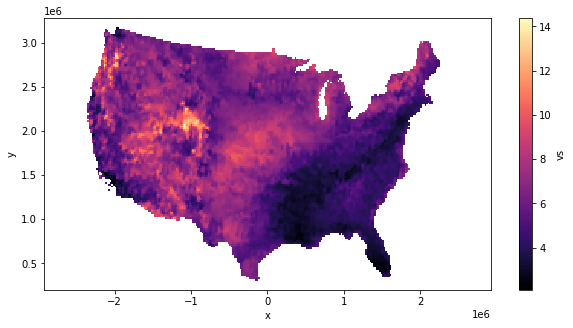

In [14]:
arr.vs.max("time").plot(figsize=(10, 5), cmap="magma")